## Our goal is to identify the most important features for predicting the Historical_cost_of_ride

In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv('dynamic_pricing.csv')
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


#### checking any missing or incorrect data types

In [3]:
#check for missing values and data types
missing_values = data.isnull().sum()
data_type = data.dtypes

In [4]:
missing_values_report = pd.DataFrame({'Missing Values': missing_values, 'Data Types': data_type})
missing_values_report

,Missing Values,Data Types
Number_of_Riders,0,int64
Number_of_Drivers,0,int64
Location_Category,0,object
Customer_Loyalty_Status,0,object
Number_of_Past_Rides,0,int64
Average_Ratings,0,float64
Time_of_Booking,0,object
Vehicle_Type,0,object
Expected_Ride_Duration,0,int64
Historical_Cost_of_Ride,0,float64


## Univariate Analysis
data quality check complete no immediate cleaning required we can move on to univariate analysis .it will help understand the distribution of each variable individually . i will start by analyzing the distribution of numerical features to understand their distribution

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


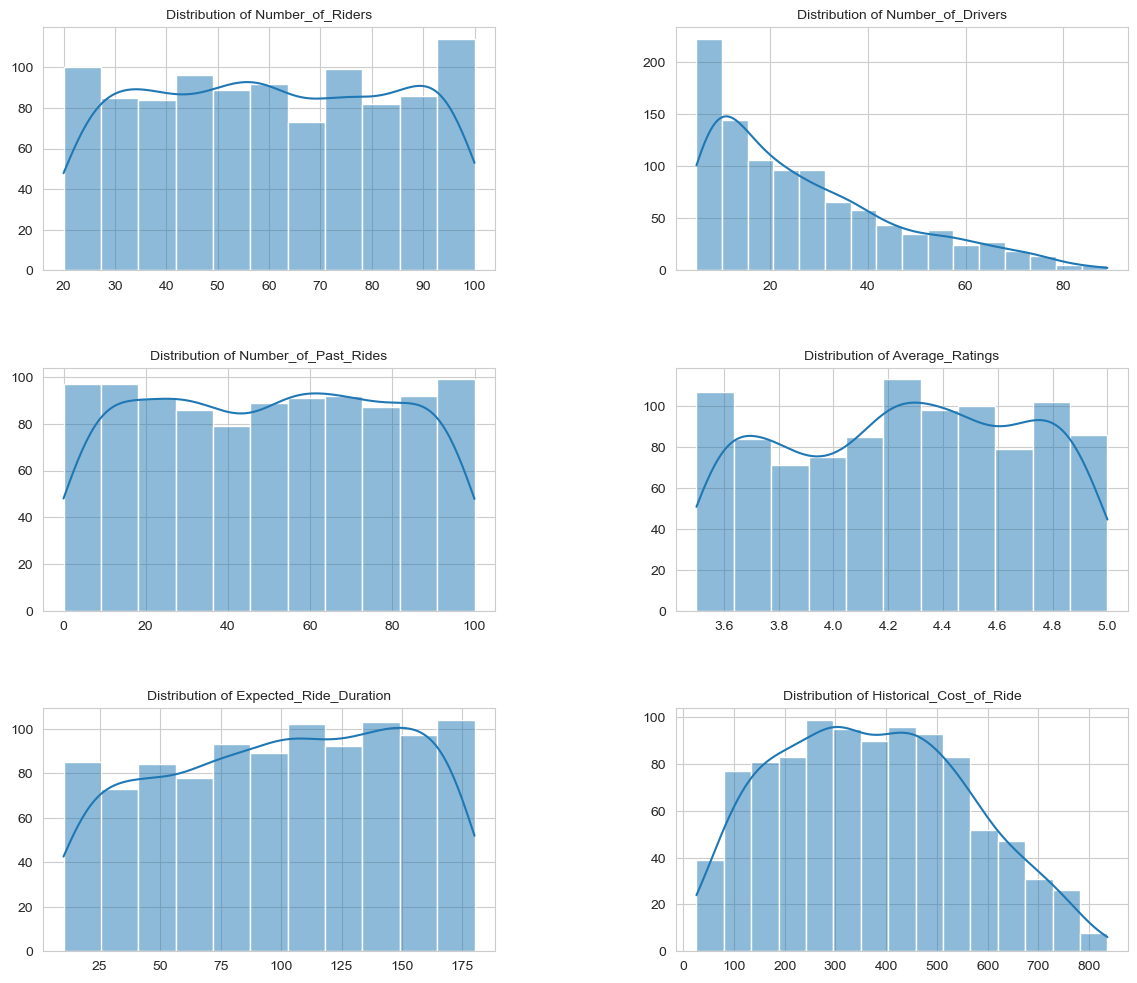

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
#set the aesthetics for the plots
sns.set_style("whitegrid")

#define the numerical and categorical columns
numerical_cols = ['Number_of_Riders', 'Number_of_Drivers','Number_of_Past_Rides','Average_Ratings','Expected_Ride_Duration','Historical_Cost_of_Ride']
categorical_cols = ['Location_Category','Customer_Loyalty_Status','Time_of_Booking','Vehicle_Type']

#descriptive statistics for numerical features
descriptive_stats = data[numerical_cols].describe()

#plotting distributions for numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}', fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

descriptive_stats

##### categorical feature
will explore categorical features to understand their distribution and how they might relate to the target variable . we will plot the counts of each category for the categorical features and note observatiobns

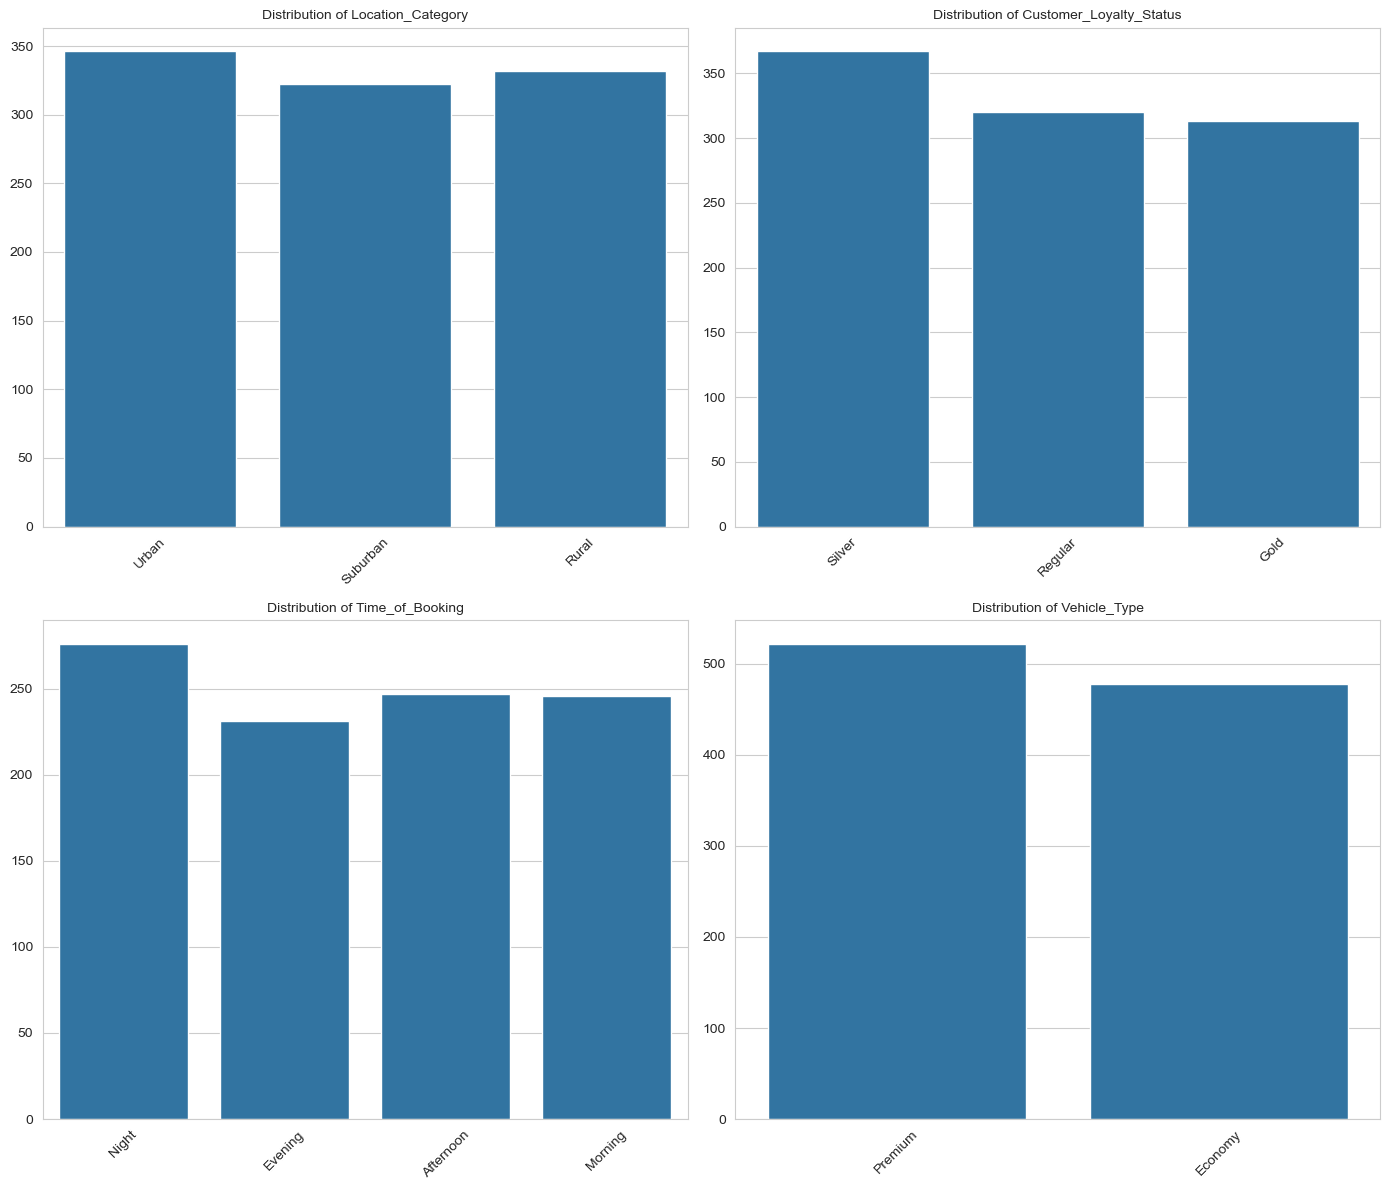

In [10]:
# plotting distributions for categorical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}', fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()
    

### Bivariate Analysis
After analyzing the distributions of numerical and categorical features, , next step is to perform bivariate analysis to explore the relationships between the target variable(historical cost of ride) and the other features. this analysis will help us identify which features have the most significant impact on ride cost, guiding our feature selection process for predictive modelling lets proceed with this.

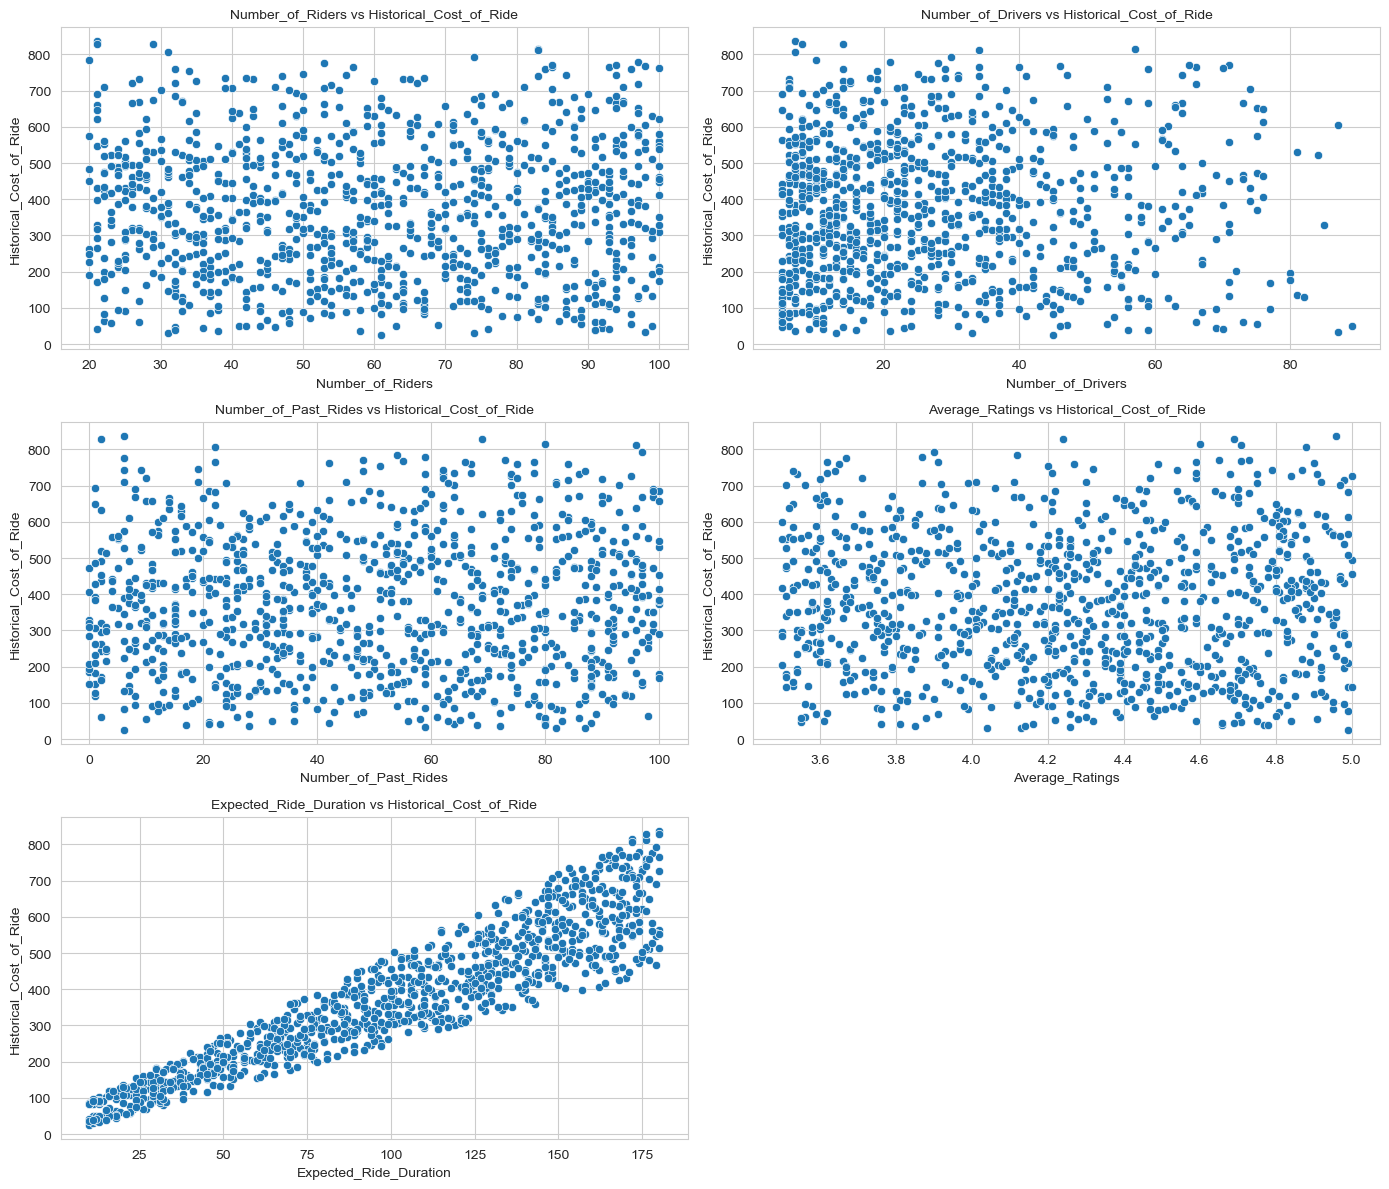

In [12]:
num_plots = len(numerical_cols[:-1])
n_cols = 2
n_rows = (num_plots + 1) // n_cols
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

axes = axes.flatten()

#plot each numerical column against the hostorical cost
for i, col in enumerate(numerical_cols[:-1]):
    sns.scatterplot(data=data, x=col, y='Historical_Cost_of_Ride', ax=axes[i])
    axes[i].set_title(f'{col} vs Historical_Cost_of_Ride', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Historical_Cost_of_Ride')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### examine how the categorical features relate to the historical cost of ride using box plots to explore the variance in ride costs across different categories it will help identify if certain categories are consistently associated with higher or lower ride cost

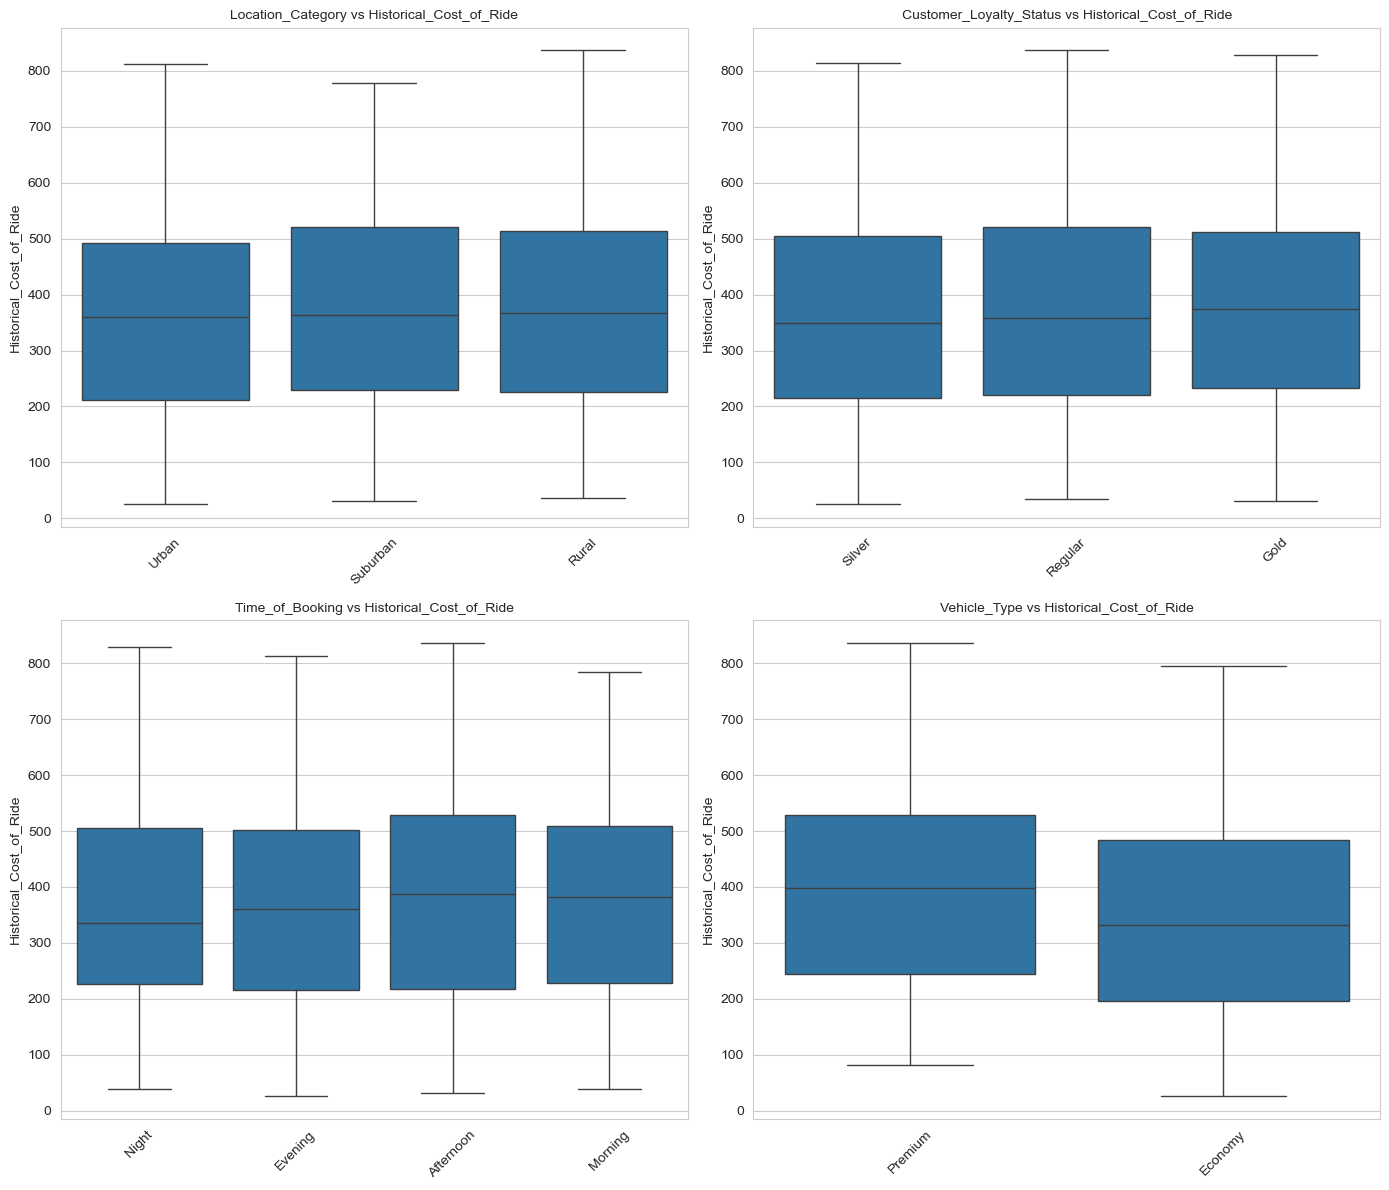

In [14]:
# Bivariate Analysis: categorical features vs historical cost of rides
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, col in enumerate(categorical_cols):
    sns.boxplot(data, x=col, y='Historical_Cost_of_Ride', ax=axes[i//2, i%2])
    axes[i//2,i%2].set_title(f'{col} vs Historical_Cost_of_Ride',fontsize=10)
    axes[i//2,i%2].set_xlabel('')
    axes[i//2,i%2].set_ylabel('Historical_Cost_of_Ride')
    axes[i//2,i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()

Based on the EDA, the following features are identified as potentially important for predicting ride costs:

Expected_Ride_Duration: Shows a clear relationship with ride cost.
Location_Category: Significant variance in costs by location.
Customer_Loyalty_Status: Variability in costs suggests an impact on pricing.
Time_of_Booking: Variations in costs indicate an influence of demand at different times.
Vehicle_Type: Directly influences cost with clear distinctions between vehicle types.
The other numerical features (Number_of_Riders, Number_of_Drivers, Number_of_Past_Rides, Average_Ratings) do not show strong linear relationships with the target variable but could still be useful, especially when combined with other features or through engineered features that capture non-linear relationships or interactions.